<a href="https://colab.research.google.com/github/turtle98/datamining/blob/main/datamining_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
##importing libraries
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
from matplotlib import pyplot as plt
import joblib
from matplotlib import style
style.use("ggplot")

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

''' Classifier 모듈 '''
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier,StackingClassifier
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

''' metric 모듈 '''
from sklearn.metrics import f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def seed_everything(seed):
  '''
  데이터셋을 다루다 보면 데이터셋을 train_data와 test_data로 나누거나, 랜덤 샘플링할 때가 있다
  seed라는 것을 고정해주지 않으면, 코드를 실행할때마다 난수가 다르게 생성되어 재현성이 떨어진다
  보통 우리는 다음처럼 seed를 고정한 상태로 알고리즘을 실행하여, 난수의 생성 패턴을 동일하게 관리할 수 있다
  '''
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  print('done')

In [ ]:
seed_everything(42)

done


##import dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/datamining/UCI_Credit_Card.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# change target variable name to make it shorter
df.rename(columns = {'default.payment.next.month':'default_pay'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
def EDA(df):
  '''
  dataset이라는 인자를 받아서, 관련 데이터셋의 모양, 데이터셋의 예시, 요약 정보를 print해주는 함수

  '''
  print('-------------------------데이터셋 모양---------------------------\n')
  print('총 데이터 개수:', df.shape[0])
  print('총 변수 개수:', df.shape[1])
  print('\n-------------------------데이터셋 예시---------------------------\n')
  print(df.head())
  print('\n-------------------------데이터셋 요약 정보---------------------------\n')
  print(df.info())
  print(df.describe())
  print('\n-------------------------각 데이터별 unique한 값의 갯수---------------------------\n')
  print(df.nunique().sort_values(ascending=True))
  print('\n-------------------------MISSING VALUE CHECK---------------------------\n')
  print(df.isnull().sum())

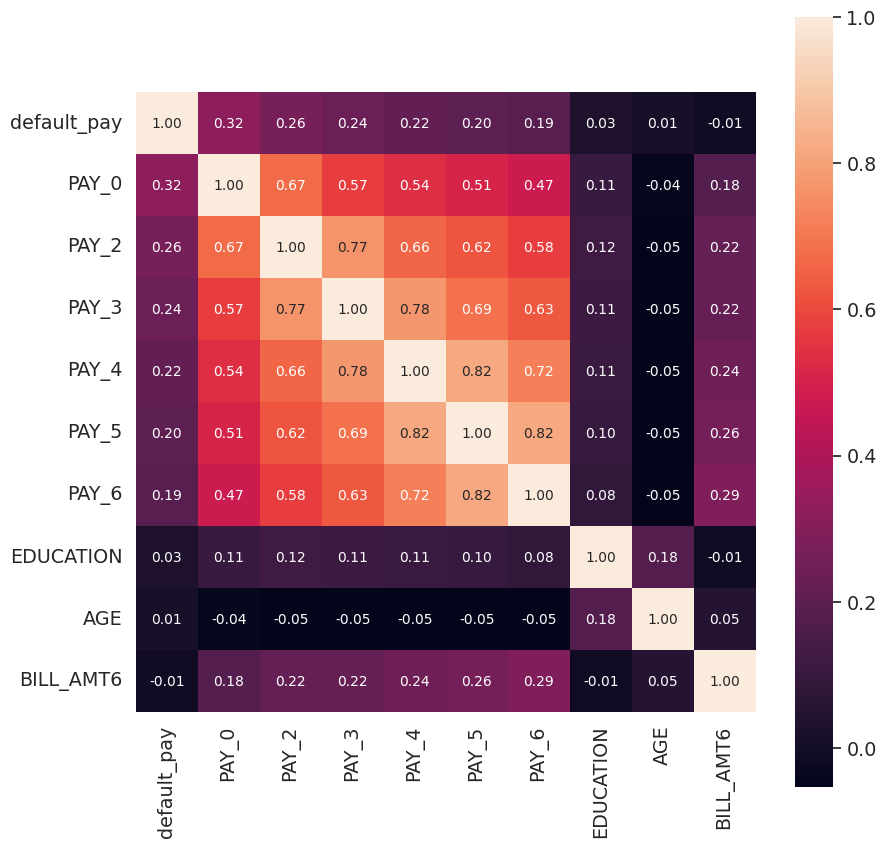

In [ ]:
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'default_pay')['default_pay'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

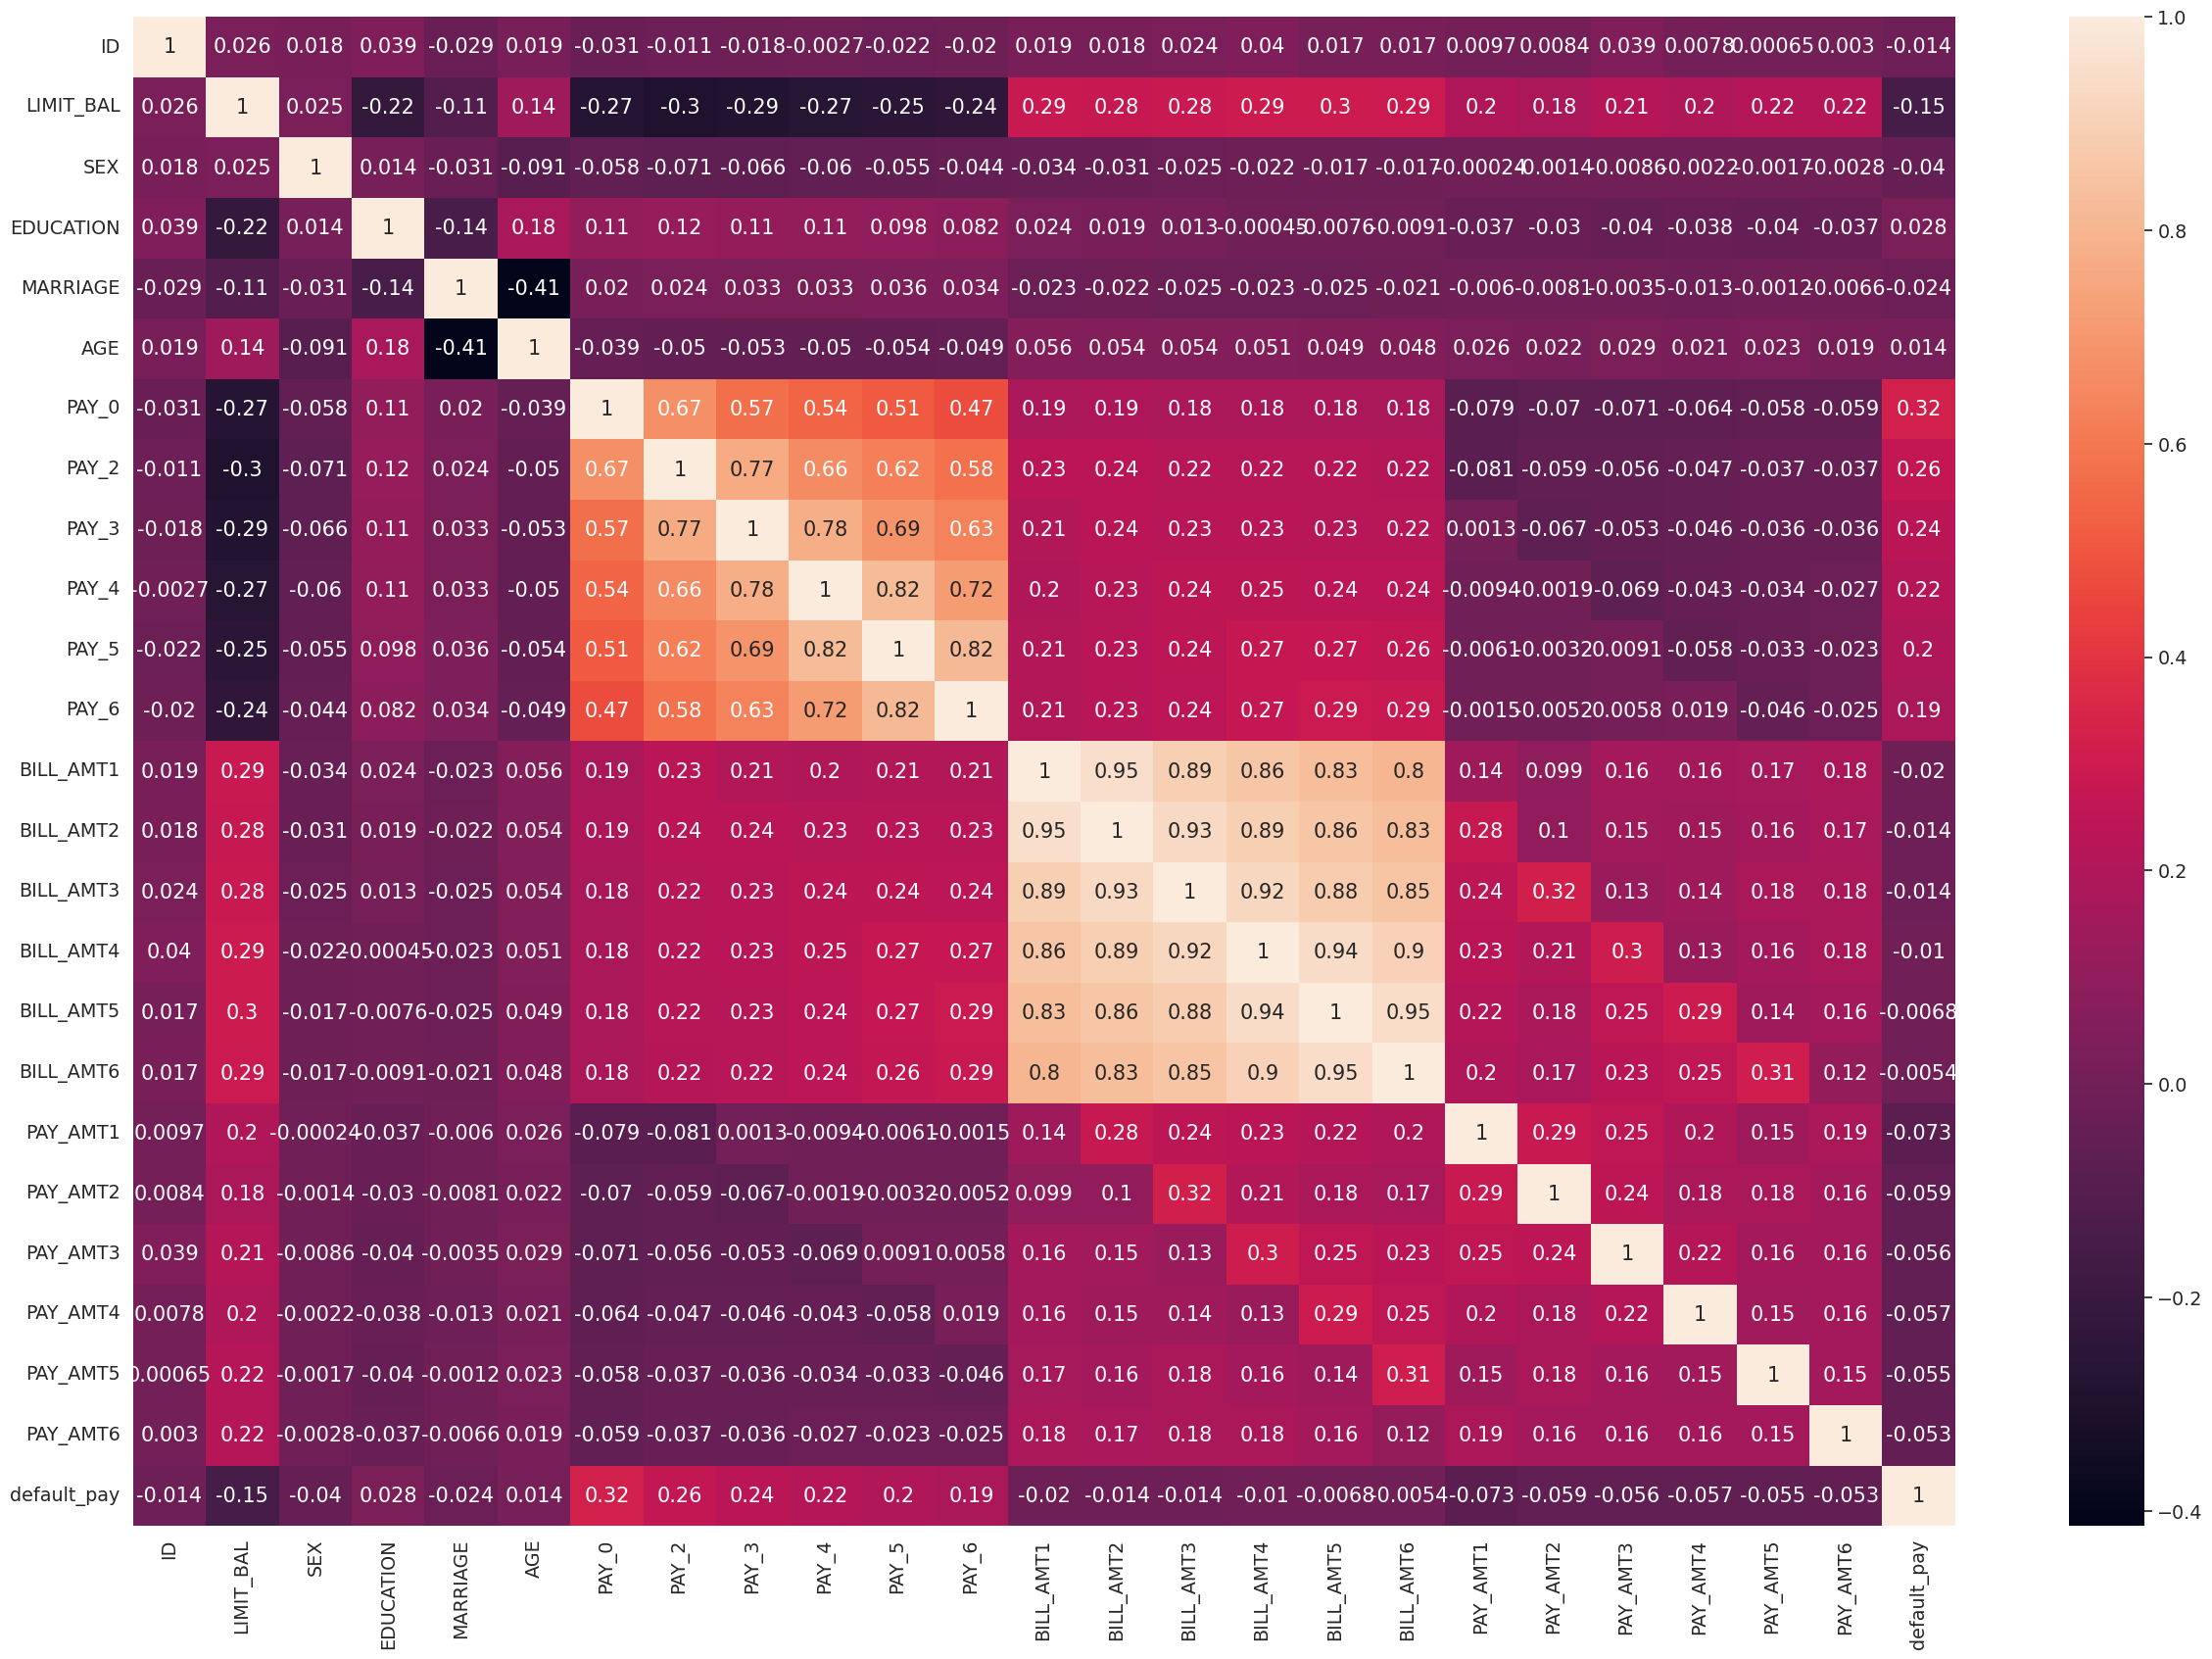

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()


# We drop the column 'ID'. All datatypes are int or float. We have to change categorical variables into object.

In [ ]:
###FEATURE ENGINEERING
df = df.drop(['ID'], axis = 1)
df['BILL_AVG'] = df.iloc[:,11:16].mean(axis=1)
df['BILL_STD'] = df.iloc[:,11:16].std(axis=1)
df['PAY_AVG'] = df.iloc[:,17:22].mean(axis=1)
df['PAY_STD'] = df.iloc[:,17:22].std(axis=1)
df['DIFF_1'] = df.iloc[:,11] - df.iloc[:,17]
df['DIFF_2'] = df.iloc[:,12] - df.iloc[:,18]
df['DIFF_3'] = df.iloc[:,13] - df.iloc[:,19]
df['DIFF_4'] = df.iloc[:,14] - df.iloc[:,20]
df['DIFF_5'] = df.iloc[:,15] - df.iloc[:,21]
df['DIFF_6'] = df.iloc[:,16] - df.iloc[:,22]
#weights = pd.Series([0.1, 0.2, 0.3,0.4,0.5,1], index=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
#df['SUM'] = (df.iloc[:,5:11].mul(weights)).sum(1)

In [ ]:
# change the datatype of categorical features from integer to category

df.SEX = df.SEX.astype("category")
df.EDUCATION = df.EDUCATION.astype("category")
df.MARRIAGE = df.MARRIAGE.astype("category")
df.PAY_0 = df.PAY_0.astype("category")
df.PAY_2 = df.PAY_2.astype("category")
df.PAY_3 = df.PAY_3.astype("category")
df.PAY_4 = df.PAY_4.astype("category")
df.PAY_5 = df.PAY_5.astype("category")
df.PAY_6 = df.PAY_6.astype("category")
#df.default_pay = df.default_pay.astype("category")

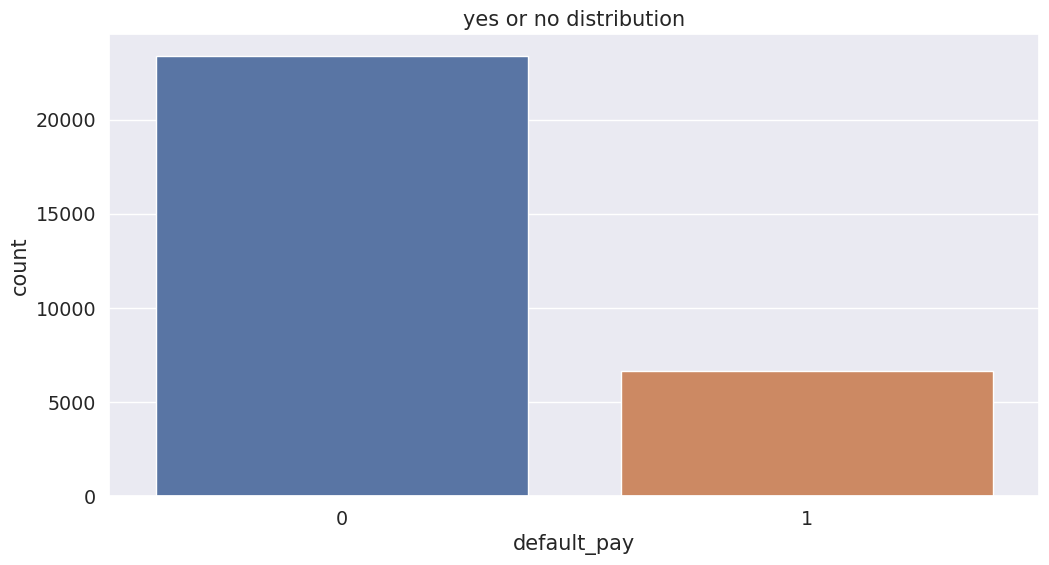

----------------데이터분포정도-------------------
0    77.88
1    22.12
Name: default_pay, dtype: float64


In [ ]:
plt.figure(figsize=(12,6))
plot = sns.countplot(data=df, x="default_pay")
plt.title("yes or no distribution")
plt.show()
#yes or no의 percentage를 구해보자
print('----------------데이터분포정도-------------------')
percentage = df['default_pay'].value_counts(normalize=True)*100
print(percentage)
##smote

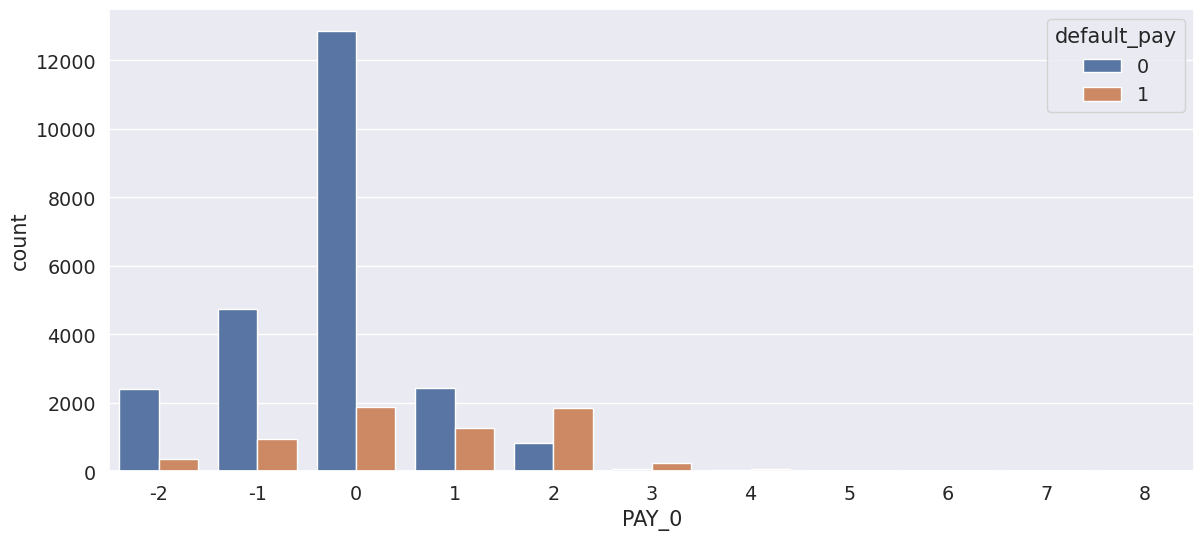

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='PAY_0', hue = 'default_pay')
plt.show()

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_pay', 'BILL_AVG', 'BILL_STD', 'PAY_AVG', 'PAY_STD']


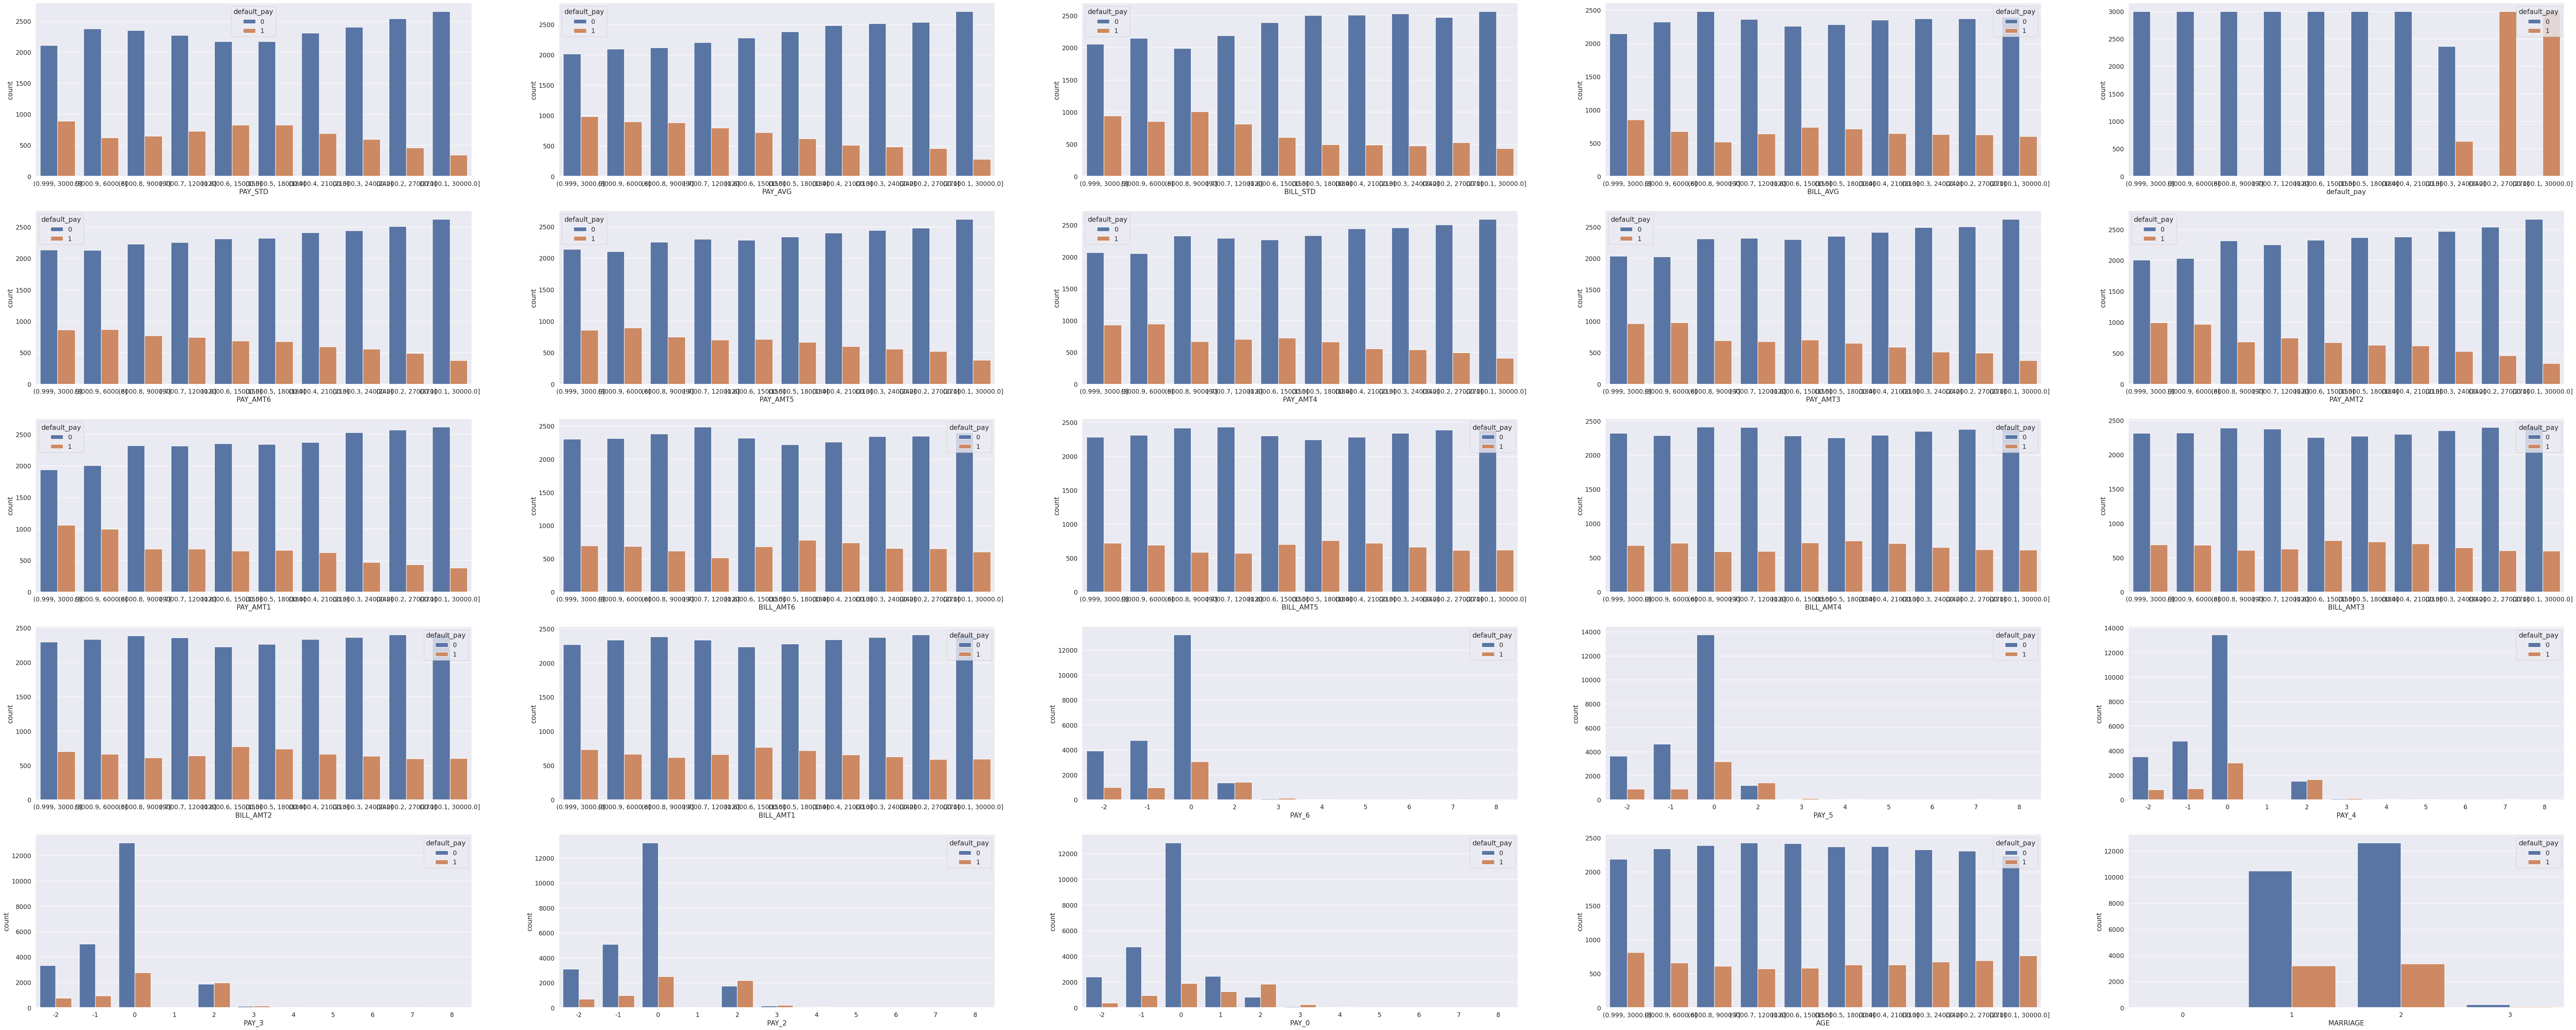

In [ ]:
##subpplots (5,5)
fig, ax = plt.subplots(5,5, figsize=(100,40))
#feature 칼럼명을 다 저장해놓은 list
columns = list(df.columns)
print(columns)
x = np.sqrt(len(columns)+1)
for i in range(int(x)):
  for j in range(int(x)):
    col_name = columns.pop()
    if df[col_name].dtype != 'category':
      data=df.assign(quantile=pd.qcut(df[col_name].rank(method='first'), q=10))
      sns.countplot(data=data, x='quantile', hue = 'default_pay', ax=ax[i,j]).set(xlabel=col_name)
    else:
      data=df
      sns.countplot(data=data, x=col_name, hue = 'default_pay', ax=ax[i,j])
fig.show()




In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_STD,PAY_AVG,PAY_STD,DIFF_1,DIFF_2,DIFF_3,DIFF_4,DIFF_5,DIFF_6,SUM
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,1839.726257,137.8,308.130167,3913.0,2413.0,689.0,0.0,0.0,0.0,-3.1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,676.112195,600.0,547.722558,2682.0,725.0,1682.0,2272.0,3455.0,1261.0,2.3
2,90000.0,2,2,2,34,0,0,0,0,0,...,6737.262664,1203.6,278.863407,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0,0.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,10733.040962,1477.6,488.009529,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0,0.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,11917.477472,11674.0,14573.598578,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,78061.710695,8310.0,6824.289670,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0,0.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3010.863381,2898.0,3701.211626,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0,-1.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,9592.297285,5640.0,9308.490748,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0,1.2
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,36803.959044,29075.4,38645.243275,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0,-1.1


##Baseline model

In [ ]:
###Baseline Model###
def pre_basic(df):
  #df를 독립변수 X와 종속 변수 Y로 분리시키자
  y = df['default_pay']
  X = df.drop(['default_pay', 'PAY_AVG', 'PAY_STD','BILL_AVG','BILL_STD', 'DIFF_1','DIFF_2','DIFF_3','DIFF_4','DIFF_5','DIFF_6'], axis = 1)
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  return train_x, test_x, train_y, test_y

train_x, test_x, train_y, test_y = pre_basic(df)
RF = RandomForestClassifier(random_state=42)
baseline = RF.fit(train_x, train_y)
y_pred = baseline.predict(test_x)
predictions = [round(value) for value in y_pred]
f1_score_A = f1_score(test_y, predictions, average = 'macro')
print('f1 score trained on A : %.2f%%'%(f1_score_A*100))

f1 score trained on A : 67.06%


In [ ]:
def pre_mlp(df):
  #df를 독립변수 X와 종속 변수 Y로 분리시키자
  y = df['default_pay']
  X = df.drop(['default_pay'], axis = 1)
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  return train_x, test_x, train_y, test_y

class mlp_clf:
    def __init__(self, df):
        self.df = df
        #데이터 전처리
        self.train_x, self.test_x, self.train_y, self.test_y = self.getdata()
        self.modelA = self.getmodel_A()
        self.bestmodel = self.modelA

    def getdata(self):
        train_x, test_x, train_y, test_y = pre_mlp(self.df)
        train_x = pd.get_dummies(train_x, drop_first = True)
        test_x = pd.get_dummies(test_x, drop_first = True)
        test_x = test_x.reindex(columns = train_x.columns, fill_value=0)
        le = preprocessing.LabelEncoder()
        train_y=le.fit_transform(train_y)
        test_y=le.transform(test_y)

        return train_x, test_x, train_y, test_y

    def getmodel_A(self):
        scaler = MinMaxScaler()
        scaler.fit(self.train_x)
        self.train_x = scaler.transform(self.train_x)
        self.test_x = scaler.transform(self.test_x)
        #parameter_space = {
        #'hidden_layer_sizes': [(5,3), (15,5), (50,25)],
        #}
        model = MLPClassifier(batch_size=self.train_x.shape[0], solver = 'adam', activation='relu', random_state = 42, alpha = 0.001, max_iter = 500, hidden_layer_sizes = (50,25))
       # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5 ,scoring='f1_macro')
        best_model = model.fit(self.train_x, self.train_y)
        return best_model

    def bestparams(self):
        return self.modelA.best_params_


    def predict(self):
        y_pred_A = self.modelA.predict(self.test_x)
        predictions_A = [round(value) for value in y_pred_A]
        confidence = 0.95
        # 평가하기
        f1_score_A = f1_score(self.test_y, predictions_A, average = 'macro')
        print('f1 score trained on A : %.2f%%'%(f1_score_A*100))



In [ ]:
clf1 =  mlp_clf(df)

In [ ]:
clf1.predict()

f1 score trained on A : 68.29%


In [ ]:
def pre_rf(df):
  #df를 독립변수 X와 종속 변수 Y로 분리시키자
  y = df['default_pay']
  X = df.drop(['default_pay'], axis = 1)
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  return train_x, test_x, train_y, test_y


class rf_clf:
    def __init__(self, df):
        self.df = df
        #데이터 전처리
        self.train_x, self.test_x, self.train_y, self.test_y = self.getdata()
        self.modelA = self.getmodel_A()
        self.bestmodel = self.modelA

    def getdata(self):
        train_x, test_x, train_y, test_y = pre_rf(self.df)
        train_x = pd.get_dummies(train_x, drop_first = True)
        test_x = pd.get_dummies(test_x, drop_first = True)
        test_x = test_x.reindex(columns = train_x.columns, fill_value=0)
        le = preprocessing.LabelEncoder()
        train_y=le.fit_transform(train_y)
        test_y=le.transform(test_y)

        return train_x, test_x, train_y, test_y

    def getmodel_A(self):
        scaler = MinMaxScaler()
        scaler.fit(self.train_x)
        self.train_x = scaler.transform(self.train_x)
        self.test_x = scaler.transform(self.test_x)
        #param_grid = {
        #  'max_features':  ['sqrt', 'log'],
        #  'criterion' : ['gini', 'entropy']
        #}
        model = RandomForestClassifier(random_state=42, criterion = 'gini', max_features = 'sqrt', n_estimators = 500)
        #clf = GridSearchCV(model, param_grid, n_jobs=-1, cv=5, scoring='f1_macro')
        best_model = model.fit(self.train_x, self.train_y)
        return best_model

    def bestparams(self):
        return self.modelA.best_params_


    def predict(self):
        y_pred_A = self.modelA.predict(self.test_x)
        predictions_A = [round(value) for value in y_pred_A]
        confidence = 0.95
        # 평가하기
        f1_score_A = f1_score(self.test_y, predictions_A, average = 'macro')
        print('f1 score trained on A : %.2f%%'%(f1_score_A*100))



In [ ]:
clf2 = rf_clf(df)

In [ ]:
clf2.predict()

f1 score trained on A : 67.78%


In [ ]:
def pre_cat(df):
  #df를 독립변수 X와 종속 변수 Y로 분리시키자
  y = df['default_pay']
  X = df.drop(['default_pay'], axis = 1)
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  return train_x, test_x, train_y, test_y


class cat_clf:
    def __init__(self, df):
        self.df = df
        #데이터 전처리
        self.train_x, self.test_x, self.train_y, self.test_y = self.getdata()
        self.modelA = self.getmodel_A()
        self.bestmodel = self.modelA

    def getdata(self):
        train_x, test_x, train_y, test_y = pre_cat(self.df)
        #train_x = pd.get_dummies(train_x, drop_first = True)
        #test_x = pd.get_dummies(test_x, drop_first = True)
       # test_x = test_x.reindex(columns = train_x.columns, fill_value=0)
        le = preprocessing.LabelEncoder()
        train_y=le.fit_transform(train_y)
        test_y=le.transform(test_y)

        return train_x, test_x, train_y, test_y

    def getmodel_A(self):
        scaler = MinMaxScaler()
        scaler.fit(self.train_x)
        self.train_x = scaler.transform(self.train_x)
        self.test_x = scaler.transform(self.test_x)
        #param_grid = {
        #          'depth'    : [3,5,7,9],
        #          'learning_rate' : [0.01,0.03,0.05]
        #         }
        model = CatBoostClassifier(random_state = 42, depth = 7, learning_rate = 0.05)
        #clf = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)
        best_model = model.fit(self.train_x, self.train_y)
        return best_model

    def bestparams(self):
        return self.modelA.best_params_


    def predict(self):
        y_pred_A = self.modelA.predict(self.test_x)
        predictions_A = [round(value) for value in y_pred_A]
        confidence = 0.95
        # 평가하기
        f1_score_A = f1_score(self.test_y, predictions_A, average = 'macro')
        print('f1 score trained on A : %.2f%%'%(f1_score_A*100))



In [ ]:
clf3 = cat_clf(df)

0:	learn: 0.6645876	total: 34.7ms	remaining: 34.6s
1:	learn: 0.6389688	total: 58.4ms	remaining: 29.1s
2:	learn: 0.6158505	total: 81.9ms	remaining: 27.2s
3:	learn: 0.5954559	total: 108ms	remaining: 27s
4:	learn: 0.5777254	total: 132ms	remaining: 26.3s
5:	learn: 0.5619809	total: 154ms	remaining: 25.6s
6:	learn: 0.5479331	total: 183ms	remaining: 25.9s
7:	learn: 0.5353688	total: 214ms	remaining: 26.6s
8:	learn: 0.5243240	total: 242ms	remaining: 26.6s
9:	learn: 0.5145067	total: 263ms	remaining: 26s
10:	learn: 0.5055747	total: 284ms	remaining: 25.6s
11:	learn: 0.4975007	total: 306ms	remaining: 25.2s
12:	learn: 0.4907188	total: 339ms	remaining: 25.7s
13:	learn: 0.4844207	total: 360ms	remaining: 25.4s
14:	learn: 0.4784606	total: 382ms	remaining: 25.1s
15:	learn: 0.4735454	total: 403ms	remaining: 24.8s
16:	learn: 0.4689197	total: 425ms	remaining: 24.6s
17:	learn: 0.4644828	total: 460ms	remaining: 25.1s
18:	learn: 0.4608209	total: 482ms	remaining: 24.9s
19:	learn: 0.4574936	total: 503ms	remainin

In [ ]:
clf3.predict()

f1 score trained on A : 67.56%


In [ ]:
def pre_xgb(df):
  #df를 독립변수 X와 종속 변수 Y로 분리시키자
  y = df['default_pay']
  X = df.drop(['default_pay'], axis = 1)
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  return train_x, test_x, train_y, test_y


class xgb_clf:
    def __init__(self, df):
        self.df = df
        #데이터 전처리
        self.train_x, self.test_x, self.train_y, self.test_y = self.getdata()
        self.modelA = self.getmodel_A()
        self.bestmodel = self.modelA

    def getdata(self):
        train_x, test_x, train_y, test_y = pre_xgb(self.df)
        train_x = pd.get_dummies(train_x, drop_first = True)
        test_x = pd.get_dummies(test_x, drop_first = True)
        test_x = test_x.reindex(columns = train_x.columns, fill_value=0)
        le = preprocessing.LabelEncoder()
        train_y=le.fit_transform(train_y)
        test_y=le.transform(test_y)

        return train_x, test_x, train_y, test_y

    def getmodel_A(self):
        scaler = MinMaxScaler()
        scaler.fit(self.train_x)
        self.train_x = scaler.transform(self.train_x)
        self.test_x = scaler.transform(self.test_x)
        param_grid = {
            "subsample":[0.5, 0.75, 1],
            "colsample_bytree":[0.5, 0.75, 1],
        }
        model = XGBClassifier(random_state = 42,subsample = 0.75,colsample_bytree = 0.5)
        #clf = GridSearchCV(model, param_grid, n_jobs=-1, cv=5, scoring = 'f1_macro')
        best_model = model.fit(self.train_x, self.train_y)
        return best_model

    def bestparams(self):
        return self.modelA.best_params_


    def predict(self):
        y_pred_A = self.modelA.predict(self.test_x)
        predictions_A = [round(value) for value in y_pred_A]
        confidence = 0.95
        # 평가하기
        f1_score_A = f1_score(self.test_y, predictions_A, average = 'macro')
        print('f1 score trained on A : %.2f%%'%(f1_score_A*100))



In [ ]:
clf4 = xgb_clf(df)

In [ ]:
clf4.predict()
clf4.bestparams()

f1 score trained on A : 66.52%


{'colsample_bytree': 0.5, 'subsample': 0.75}

In [ ]:
def pre_lgbm(df):
  #df를 독립변수 X와 종속 변수 Y로 분리시키자
  y = df['default_pay']
  X = df.drop(['default_pay'], axis = 1)
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  return train_x, test_x, train_y, test_y

class lgbm_clf:
    def __init__(self, df):
        self.df = df
        #데이터 전처리
        self.train_x, self.test_x, self.train_y, self.test_y = self.getdata()
        self.modelA = self.getmodel_A()
        self.bestmodel = self.modelA

    def getdata(self):
        train_x, test_x, train_y, test_y = pre_lgbm(self.df)
        train_x = pd.get_dummies(train_x, drop_first = True)
        test_x = pd.get_dummies(test_x, drop_first = True)
        test_x = test_x.reindex(columns = train_x.columns, fill_value=0)
        le = preprocessing.LabelEncoder()
        train_y=le.fit_transform(train_y)
        test_y=le.transform(test_y)

        return train_x, test_x, train_y, test_y

    def getmodel_A(self):
        scaler = MinMaxScaler()
        scaler.fit(self.train_x)
        self.train_x = scaler.transform(self.train_x)
        self.test_x = scaler.transform(self.test_x)
        param_grid = {
          'colsample_bytree': [0.5, 0.75, 1],
          'subsample': [0.5, 0.75, 1]
        }
        model = LGBMClassifier(random_state=42, subsample = 0.5, colsample_bytree = 0.75)
        #clf = GridSearchCV(model, param_grid, n_jobs=-1, cv=5, scoring='f1_macro')
        best_model = model.fit(self.train_x, self.train_y)
        return best_model

    def bestparams(self):
        return self.modelA.best_params_


    def predict(self):
        y_pred_A = self.modelA.predict(self.test_x)
        predictions_A = [round(value) for value in y_pred_A]
        confidence = 0.95
        # 평가하기
        f1_score_A = f1_score(self.test_y, predictions_A, average = 'macro')
        print('f1 score trained on A : %.2f%%'%(f1_score_A*100))



In [ ]:
clf5 = lgbm_clf(df)

In [ ]:
clf5.predict()

f1 score trained on A : 68.11%


AttributeError: ignored

<Axes: >

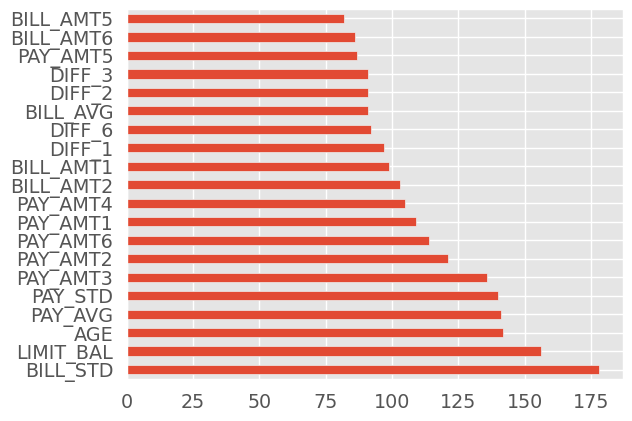

In [ ]:
import lightgbm
#lightgbm.plot_importance(clf5.bestmodel, max_num_features = 10, ylabel='')
feat_imp_gbm = pd.Series(clf5.bestmodel.feature_importances_,index = train_x.columns)
feat_imp_gbm.nlargest(20).plot(kind='barh')

In [ ]:
train_x, test_x, train_y, test_y = clf2.getdata()

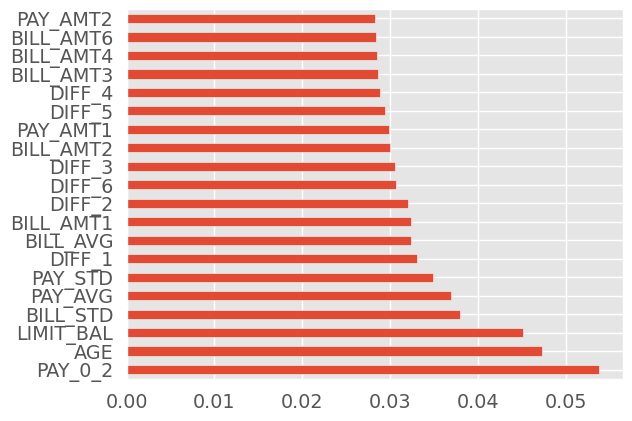

In [ ]:
feat_importances = pd.Series(clf2.bestmodel.feature_importances_, index=train_x.columns)
feat_importances.nlargest(20).plot(kind='barh')

fig.tight_layout()

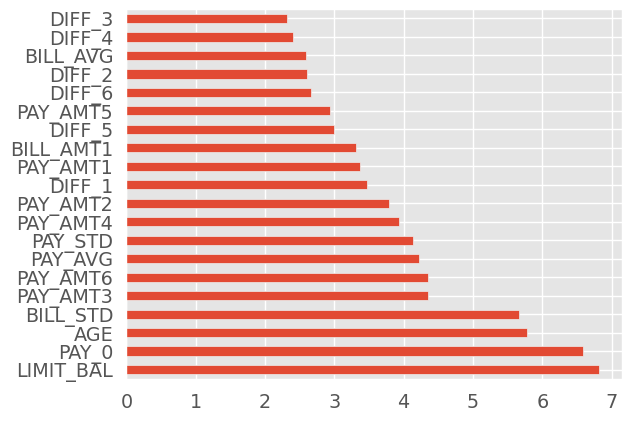

In [ ]:
feat_imp_cat = pd.Series(clf3.bestmodel.feature_importances_, index=df.drop(['default_pay'], axis = 1).columns)
feat_imp_cat.nlargest(20).plot(kind='barh')

fig.tight_layout()

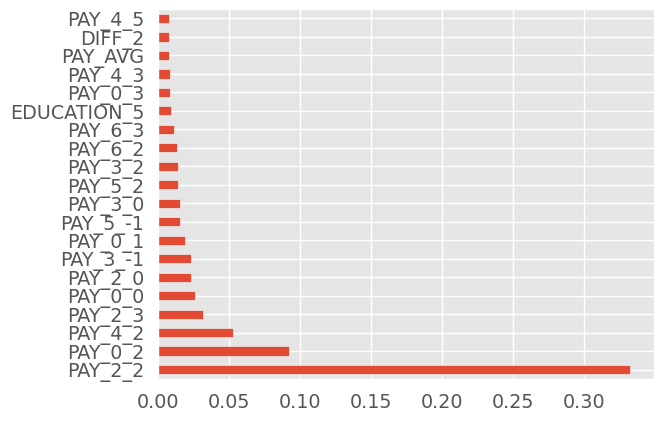

In [ ]:
feat_imp_xg = pd.Series(clf4.bestmodel.feature_importances_, index=train_x.columns)
feat_imp_xg.nlargest(20).plot(kind='barh')

fig.tight_layout()